### Transformer with BiLSTM

### Import Library

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torchvision 
from torchvision import datasets 
import random

### Set Random Seed

In [2]:
seed = 1234 
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

### Dataset Preparation

In [3]:
import os 
train_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/train"
validate_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/validate"
test_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/test"
train_video_list = []
validate_video_list = []
test_video_list = []
train_video_list = os.listdir(train_video_dir)
validate_video_list = os.listdir(validate_video_dir)
test_video_list = os.listdir(test_video_dir)

print("Number of train_video_list : ", len(train_video_list))
print("List of train_video_list : ", train_video_list)
print("Number of validate_video_list : ", len(validate_video_list))
print("List of validate_video_list : ", validate_video_list)
print("Number of test_video_list : ", len(test_video_list))
print("List of test_video_list : ", test_video_list)

Number of train_video_list :  80
List of train_video_list :  ['beautiful.MOV', 'beautiful_1.MOV', 'beautiful_2.MOV', 'beautiful_3.MOV', 'beautiful_4.MOV', 'blind.MOV', 'blind_1.MOV', 'blind_2.MOV', 'blind_3.MOV', 'blind_4.MOV', 'deaf.MOV', 'deaf_1.MOV', 'deaf_2.MOV', 'deaf_3.MOV', 'deaf_4.MOV', 'happy.MOV', 'happy_.MOV', 'happy_1.MOV', 'happy_10.MOV', 'happy_11.MOV', 'happy_12.MOV', 'happy_13.MOV', 'happy_14.MOV', 'happy_15.MOV', 'happy_16.MOV', 'happy_2.MOV', 'happy_3.MOV', 'happy_4.MOV', 'happy_5.MOV', 'happy_6.MOV', 'happy_7.MOV', 'happy_8.MOV', 'happy_9.MOV', 'lound.MOV', 'lound_1.MOV', 'lound_10.MOV', 'lound_11.MOV', 'lound_12.MOV', 'lound_13.MOV', 'lound_14.MOV', 'lound_15.MOV', 'lound_16.MOV', 'lound_2.MOV', 'lound_3.MOV', 'lound_4.MOV', 'lound_5.MOV', 'lound_6.MOV', 'lound_7.MOV', 'lound_8.MOV', 'lound_9.MOV', 'quiet.MOV', 'quiet_1.MOV', 'quiet_10.MOV', 'quiet_11.MOV', 'quiet_12.MOV', 'quiet_13.MOV', 'quiet_14.MOV', 'quiet_15.MOV', 'quiet_16.MOV', 'quiet_17.MOV', 'quiet_2.MOV',

In [4]:
train_actions = np.array(train_video_list)
print(train_actions)
validate_actions = np.array(validate_video_list)
print(validate_actions)
test_actions = np.array(test_video_list)
print(test_actions)

['beautiful.MOV' 'beautiful_1.MOV' 'beautiful_2.MOV' 'beautiful_3.MOV'
 'beautiful_4.MOV' 'blind.MOV' 'blind_1.MOV' 'blind_2.MOV' 'blind_3.MOV'
 'blind_4.MOV' 'deaf.MOV' 'deaf_1.MOV' 'deaf_2.MOV' 'deaf_3.MOV'
 'deaf_4.MOV' 'happy.MOV' 'happy_.MOV' 'happy_1.MOV' 'happy_10.MOV'
 'happy_11.MOV' 'happy_12.MOV' 'happy_13.MOV' 'happy_14.MOV'
 'happy_15.MOV' 'happy_16.MOV' 'happy_2.MOV' 'happy_3.MOV' 'happy_4.MOV'
 'happy_5.MOV' 'happy_6.MOV' 'happy_7.MOV' 'happy_8.MOV' 'happy_9.MOV'
 'lound.MOV' 'lound_1.MOV' 'lound_10.MOV' 'lound_11.MOV' 'lound_12.MOV'
 'lound_13.MOV' 'lound_14.MOV' 'lound_15.MOV' 'lound_16.MOV' 'lound_2.MOV'
 'lound_3.MOV' 'lound_4.MOV' 'lound_5.MOV' 'lound_6.MOV' 'lound_7.MOV'
 'lound_8.MOV' 'lound_9.MOV' 'quiet.MOV' 'quiet_1.MOV' 'quiet_10.MOV'
 'quiet_11.MOV' 'quiet_12.MOV' 'quiet_13.MOV' 'quiet_14.MOV'
 'quiet_15.MOV' 'quiet_16.MOV' 'quiet_17.MOV' 'quiet_2.MOV' 'quiet_3.MOV'
 'quiet_4.MOV' 'quiet_5.MOV' 'quiet_6.MOV' 'quiet_7.MOV' 'quiet_8.MOV'
 'quiet_9.MOV' 'sad.MOV'

In [5]:
train_file_paths = []
for action in train_actions:
    video_path = os.path.join('Data for different actions/train/', action)
    # print(video_path)
    # print(action)
    train_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(train_file_paths)

['Data for different actions/train/beautiful.MOV/beautiful.npy', 'Data for different actions/train/beautiful_1.MOV/beautiful_1.npy', 'Data for different actions/train/beautiful_2.MOV/beautiful_2.npy', 'Data for different actions/train/beautiful_3.MOV/beautiful_3.npy', 'Data for different actions/train/beautiful_4.MOV/beautiful_4.npy', 'Data for different actions/train/blind.MOV/blind.npy', 'Data for different actions/train/blind_1.MOV/blind_1.npy', 'Data for different actions/train/blind_2.MOV/blind_2.npy', 'Data for different actions/train/blind_3.MOV/blind_3.npy', 'Data for different actions/train/blind_4.MOV/blind_4.npy', 'Data for different actions/train/deaf.MOV/deaf.npy', 'Data for different actions/train/deaf_1.MOV/deaf_1.npy', 'Data for different actions/train/deaf_2.MOV/deaf_2.npy', 'Data for different actions/train/deaf_3.MOV/deaf_3.npy', 'Data for different actions/train/deaf_4.MOV/deaf_4.npy', 'Data for different actions/train/happy.MOV/happy.npy', 'Data for different actio

In [6]:
validate_file_paths = []
for action in validate_actions:
    video_path = os.path.join('Data for different actions/validate/', action)
    # print(video_path)
    # print(action)
    validate_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(validate_file_paths)

['Data for different actions/validate/beautiful_6.MOV/beautiful_6.npy', 'Data for different actions/validate/beautiful_7.MOV/beautiful_7.npy', 'Data for different actions/validate/blind_6.MOV/blind_6.npy', 'Data for different actions/validate/blind_7.MOV/blind_7.npy', 'Data for different actions/validate/deaf_6.MOV/deaf_6.npy', 'Data for different actions/validate/deaf_7.MOV/deaf_7.npy', 'Data for different actions/validate/happy_19.MOV/happy_19.npy', 'Data for different actions/validate/lound_17.MOV/lound_17.npy', 'Data for different actions/validate/lound_20.MOV/lound_20.npy', 'Data for different actions/validate/quiet_20.MOV/quiet_20.npy', 'Data for different actions/validate/sad_7.MOV/sad_7.npy']


In [7]:
test_file_paths = []
for action in test_actions:
    video_path = os.path.join('Data for different actions/test/', action)
    # print(video_path)
    # print(action)
    test_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(test_file_paths)

['Data for different actions/test/beautiful_5.MOV/beautiful_5.npy', 'Data for different actions/test/blind_5.MOV/blind_5.npy', 'Data for different actions/test/deaf_5.MOV/deaf_5.npy', 'Data for different actions/test/happy_17.MOV/happy_17.npy', 'Data for different actions/test/happy_18.MOV/happy_18.npy', 'Data for different actions/test/lound_18.MOV/lound_18.npy', 'Data for different actions/test/lound_19.MOV/lound_19.npy', 'Data for different actions/test/quiet_18.MOV/quiet_18.npy', 'Data for different actions/test/quiet_19.MOV/quiet_19.npy', 'Data for different actions/test/sad_6.MOV/sad_6.npy', 'Data for different actions/test/ugly_7.MOV/ugly_7.npy']


In [8]:
import pandas as pd
train_df = pd.read_csv("script3.csv")
validate_df = pd.read_csv("script3_validate.csv")
test_df = pd.read_csv("script3_test.csv")

In [9]:
train_labels = []
validate_labels = []
test_labels = []

for i in range(len(train_df.label)):
    train_labels.append(train_df.label[i])

for i in range(len(validate_df.label)):
    validate_labels.append(validate_df.label[i])

for i in range(len(test_df.label)):
    test_labels.append(test_df.label[i])

In [10]:
print("Train Label : ", train_labels)
print("Validate Label : ",validate_labels)
print("Test Label : ", test_labels)

Train Label :  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7]
Validate Label :  [0, 0, 1, 1, 2, 2, 3, 4, 4, 5, 6]
Test Label :  [0, 1, 2, 3, 3, 4, 4, 5, 5, 6, 7]


### Create Dataset

In [11]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# Create a custom dataset
class KeypointDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        keypoints = np.load(self.file_paths[idx])
        label = self.labels[idx]
        return torch.tensor(keypoints, dtype=torch.float32), label

In [12]:
train_dataset = KeypointDataset(train_file_paths, train_labels)
validate_dataset = KeypointDataset(validate_file_paths, validate_labels)
test_dataset = KeypointDataset(test_file_paths, test_labels)

In [13]:
train_dataset.file_paths

['Data for different actions/train/beautiful.MOV/beautiful.npy',
 'Data for different actions/train/beautiful_1.MOV/beautiful_1.npy',
 'Data for different actions/train/beautiful_2.MOV/beautiful_2.npy',
 'Data for different actions/train/beautiful_3.MOV/beautiful_3.npy',
 'Data for different actions/train/beautiful_4.MOV/beautiful_4.npy',
 'Data for different actions/train/blind.MOV/blind.npy',
 'Data for different actions/train/blind_1.MOV/blind_1.npy',
 'Data for different actions/train/blind_2.MOV/blind_2.npy',
 'Data for different actions/train/blind_3.MOV/blind_3.npy',
 'Data for different actions/train/blind_4.MOV/blind_4.npy',
 'Data for different actions/train/deaf.MOV/deaf.npy',
 'Data for different actions/train/deaf_1.MOV/deaf_1.npy',
 'Data for different actions/train/deaf_2.MOV/deaf_2.npy',
 'Data for different actions/train/deaf_3.MOV/deaf_3.npy',
 'Data for different actions/train/deaf_4.MOV/deaf_4.npy',
 'Data for different actions/train/happy.MOV/happy.npy',
 'Data for

### Create DataLoader

In [14]:
# Collate function for padding
def collate_fn(batch):
    sequences, labels = zip(*batch)
    padded_sequences = pad_sequence(sequences, batch_first=True)
    return padded_sequences, torch.tensor(labels)

In [15]:
# Create the DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(validate_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [16]:
for i, (data, label) in enumerate(train_loader):
    print(data)
    print(label)
    break

tensor([[[0.5372, 0.2159, 0.5468,  ..., 0.1965, 0.5541, 0.1945],
         [0.5372, 0.2171, 0.5466,  ..., 0.1959, 0.5540, 0.1943],
         [0.5372, 0.2175, 0.5464,  ..., 0.1961, 0.5535, 0.1944],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5353, 0.2144, 0.5451,  ..., 0.1953, 0.5538, 0.1936],
         [0.5353, 0.2151, 0.5450,  ..., 0.1950, 0.5539, 0.1934],
         [0.5353, 0.2157, 0.5449,  ..., 0.1952, 0.5542, 0.1936],
         ...,
         [0.5314, 0.2157, 0.5414,  ..., 0.1942, 0.5485, 0.1927],
         [0.5314, 0.2158, 0.5414,  ..., 0.1941, 0.5486, 0.1927],
         [0.5313, 0.2158, 0.5414,  ..., 0.1943, 0.5486, 0.1928]],

        [[0.5391, 0.2066, 0.5499,  ..., 0.1899, 0.5575, 0.1880],
         [0.5387, 0.2094, 0.5495,  ..., 0.1903, 0.5572, 0.1888],
         [0.5384, 0.2112, 0.5491,  ..., 0.1906, 0.5570, 0.

In [17]:
print(data.shape)
print(label.shape)

torch.Size([16, 79, 1086])
torch.Size([16])


In [18]:
print(data[0])

tensor([[0.5372, 0.2159, 0.5468,  ..., 0.1965, 0.5541, 0.1945],
        [0.5372, 0.2171, 0.5466,  ..., 0.1959, 0.5540, 0.1943],
        [0.5372, 0.2175, 0.5464,  ..., 0.1961, 0.5535, 0.1944],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [19]:
# for i, (data, label) in enumerate(val_loader):
#     print(data)
#     print(label)
#     break

### Model

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [21]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

In [22]:
class SignLanguageModel(nn.Module):
    def __init__(self, input_dim, n_heads, hidden_dim, n_layers, num_classes):
        super(SignLanguageModel, self).__init__()
        self.pos_encoder = PositionalEncoding(input_dim)
        self.multihead_attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=n_heads)
        self.normalize_layer_1 = nn.LayerNorm(normalized_shape=input_dim, eps=1e-05)
        self.bilstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=n_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim * 2, input_dim)
        self.normalize_layer_2 = nn.LayerNorm(normalized_shape=input_dim, eps=1e-05)
        self.fc2 = nn.Linear(input_dim, num_classes)
        self.softmax = nn.Softmax(dim=-1)

        # self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        # Positional Encoding
        x = self.pos_encoder(x)

        attn_output, attn_output_weights = self.multihead_attn(x,x,x)
        
        normalize_attn_1 = self.normalize_layer_1(attn_output + x)

        outbilstm, _ = self.bilstm(normalize_attn_1)

        out_linear = self.fc1(outbilstm)

        normalize_attn_2 = self.normalize_layer_2(out_linear + normalize_attn_1)

        x = self.fc2(normalize_attn_2)

        # x = self.softmax(x)
        # x = torch.argmax(x)
        # x = x[-1]
        x = x.mean(dim=1)
        
        return x

In [23]:
# Model Parameters
input_dim = 1086
# d_model = 512
n_heads = 6
hidden_dim = 64
n_layers = 1
num_classes = 8  # Example number, change based on actual classes

In [24]:
model = SignLanguageModel(input_dim, n_heads, hidden_dim, n_layers, num_classes).to(device)

In [25]:
data[0][1][58]

tensor(0.5597)

In [26]:
x = model(data.to(device))

In [27]:
x.shape

torch.Size([16, 8])

In [28]:
# x=x.permute(1,2,0)
print(x.shape)

torch.Size([16, 8])


In [29]:
x

tensor([[-1.1588e+00,  8.7936e-01,  8.0389e-01,  2.1566e-01,  1.7213e+00,
         -5.2067e-01, -4.0225e-01, -6.9729e-01],
        [-9.8801e-01,  8.8569e-01,  8.3478e-01,  4.2619e-02,  1.6498e+00,
         -6.5724e-01, -4.6451e-01, -7.5721e-01],
        [-8.9715e-01,  4.5872e-01,  5.9149e-01, -1.3039e-01,  1.1624e+00,
         -9.2882e-01, -3.6456e-01, -4.1379e-01],
        [-9.6057e-01,  1.3525e-01,  3.2133e-01, -1.4186e-02,  4.9164e-01,
         -8.9449e-01, -1.6581e-01,  7.0889e-02],
        [-1.1496e+00,  5.4282e-02,  3.6767e-01,  1.8679e-01,  2.3227e-01,
         -8.1619e-01, -1.8177e-02,  9.5259e-02],
        [-1.0371e+00,  1.1347e-03,  3.2772e-01,  3.5411e-01,  2.4420e-01,
         -7.3499e-01,  9.2271e-02,  1.7663e-01],
        [-8.1742e-01,  7.5610e-02,  3.0181e-01,  3.6860e-01,  5.5179e-01,
         -7.1019e-01,  7.7566e-02,  1.5662e-01],
        [-5.6314e-01,  2.5703e-01,  2.5029e-01,  2.7049e-01,  9.0340e-01,
         -6.7515e-01,  4.8171e-02,  1.9226e-01],
        [-3.4889

In [30]:
# x = x.sum(dim=0)

In [31]:
x.shape

torch.Size([16, 8])

In [32]:
torch.argmax(x)

tensor(4, device='cuda:0')

In [33]:
# # Initialize positional encoding with d_model=1086
# pos_encoding = PositionalEncoding(d_model=1086, max_len=246)

In [34]:
# output = pos_encoding(data)
# print(output[0])

In [35]:
# print(data[0])
# print(output[0])

In [36]:
criterion = nn.CrossEntropyLoss()  # For multi-class classification 
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [37]:
from sklearn.metrics import f1_score, recall_score

num_epochs = 100
loss_logger = []
accuracy_logger = []
f1_logger = []
recall_logger = []
running_loss = 0.0 
val_loss = []

all_preds = []
all_labels = []
for epoch in range(num_epochs):
    model.train()
    total_correct = 0
    total_samples = 0

    # h = torch.zeros(num_layers, batch_size, hidden_size).to(device)
    # c = torch.zeros(num_layers, batch_size, hidden_size).to(device)
    
    all_preds = []
    all_labels = []

    for i, (sequences, labels) in enumerate(train_loader):
        sequences = sequences.to(device)
        labels = labels.to(device)

        # h = h.detach()
        # c = c.detach()
        
        # Forward pass
        outputs = model(sequences)
        _, predicted = torch.max(outputs, 1)
        # outputs = outputs.sum(dim=0)
        loss = criterion(outputs, labels)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())  # Store predictions
        all_labels.extend(labels.cpu().numpy())    # Store true labels
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Log training loss and accuracy
    loss_logger.append(loss.item())
    accuracy = 100 * total_correct / total_samples
    accuracy_logger.append(accuracy)

    # Calculate F1 score and recall for training set
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1_logger.append(f1)
    recall_logger.append(recall)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%, F1 Score: {f1:.2f}, Recall: {recall:.2f}')

    # --- Validation Loop ---
    model.eval()  # Set the model to evaluation mode
    val_correct = 0
    val_samples = 0
    val_preds = []
    val_labels = []
    running_val_loss = 0.0  # Reset running loss for validation

    with torch.no_grad():  # Disable gradient calculation for validation
        # h_val = torch.zeros(num_layers, 5, hidden_size).to(device)
        # c_val = torch.zeros(num_layers, 5, hidden_size).to(device)

        for sequences, labels in val_loader:
            sequences = sequences.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(sequences)
            loss = criterion(outputs, labels) 
            running_val_loss += loss.item() 

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_samples += labels.size(0)

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

        avg_val_loss = running_val_loss / len(val_loader)  # Average validation loss
        val_loss.append(avg_val_loss)  # Log validation loss

        val_accuracy = 100 * val_correct / val_samples
        val_f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=1 )
        val_recall = recall_score(val_labels, val_preds, average='weighted', zero_division=1)

        print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%, F1 Score: {val_f1:.2f}, Recall: {val_recall:.2f}')

# --- Test Loop (after all epochs) ---
model.eval()  # Set model to evaluation mode for testing
test_correct = 0
test_samples = 0
test_preds = []
test_labels = []

with torch.no_grad():  # Disable gradient calculation for testing
    # h_test = torch.zeros(num_layers, 7, hidden_size).to(device)
    # c_test = torch.zeros(num_layers, 7, hidden_size).to(device)

    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(sequences)
        _, predicted = torch.max(outputs, 1)

        test_correct += (predicted == labels).sum().item()
        test_samples += labels.size(0)

        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * test_correct / test_samples
    test_f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=1 )
    test_recall = recall_score(test_labels, test_preds, average='weighted', zero_division=1)

    print(f'Test Accuracy: {test_accuracy:.2f}%, F1 Score: {test_f1:.2f}, Recall: {test_recall:.2f}')


Epoch [1/100], Loss: 4.3985, Accuracy: 3.75%, F1 Score: 0.03, Recall: 0.04
Validation Loss: 2.3392, Accuracy: 9.09%, F1 Score: 0.02, Recall: 0.09
Epoch [2/100], Loss: 3.1147, Accuracy: 31.25%, F1 Score: 0.24, Recall: 0.31
Validation Loss: 2.7303, Accuracy: 9.09%, F1 Score: 0.02, Recall: 0.09
Epoch [3/100], Loss: 2.3457, Accuracy: 16.25%, F1 Score: 0.09, Recall: 0.16
Validation Loss: 2.6517, Accuracy: 27.27%, F1 Score: 0.13, Recall: 0.27
Epoch [4/100], Loss: 1.9566, Accuracy: 7.50%, F1 Score: 0.06, Recall: 0.07
Validation Loss: 2.5466, Accuracy: 9.09%, F1 Score: 0.02, Recall: 0.09
Epoch [5/100], Loss: 1.9784, Accuracy: 18.75%, F1 Score: 0.08, Recall: 0.19
Validation Loss: 2.4449, Accuracy: 9.09%, F1 Score: 0.02, Recall: 0.09
Epoch [6/100], Loss: 2.0763, Accuracy: 27.50%, F1 Score: 0.20, Recall: 0.28
Validation Loss: 2.3786, Accuracy: 9.09%, F1 Score: 0.02, Recall: 0.09
Epoch [7/100], Loss: 2.1396, Accuracy: 28.75%, F1 Score: 0.21, Recall: 0.29
Validation Loss: 2.3760, Accuracy: 9.09%, F

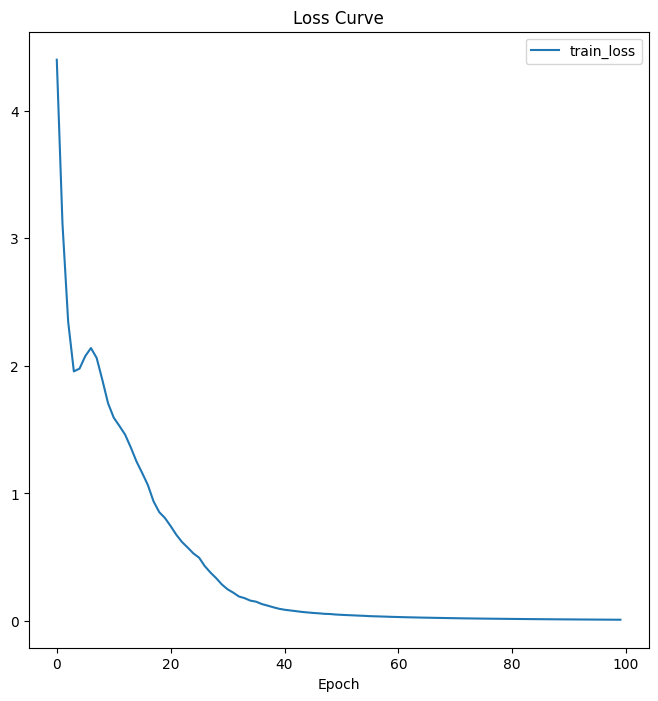

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Loss Curve")
plt.plot(loss_logger, label='train_loss')
# plt.plot(val_loss, label='val_loss')
# plt.plot(accuracy_logger,label='accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

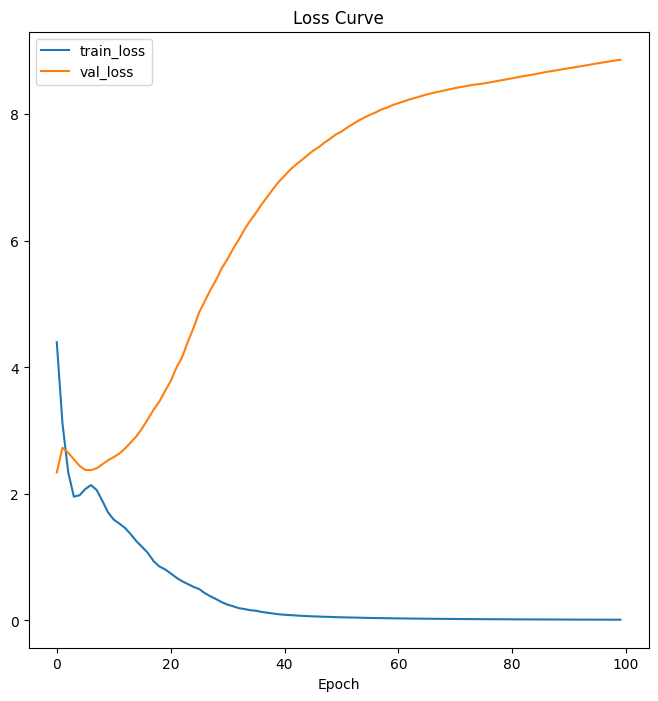

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Loss Curve")
plt.plot(loss_logger, label='train_loss')
plt.plot(val_loss, label='val_loss')
# plt.plot(accuracy_logger,label='accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [40]:
def check_accuracy(loader, model):
    if loader == train_loader:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")  
          
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            # x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [41]:
check_accuracy(train_loader, model)
# h = torch.zeros(num_layers, 7, hidden_size).to(device)
# c = torch.zeros(num_layers, 7, hidden_size).to(device)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 80 / 80 with accuracy 100.00
Checking accuracy on test data
Got 2 / 11 with accuracy 18.18
